# EDA Process

## Step 0: Imports and Reading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [54]:
df = pd.read_csv('customer_shopping_data.csv')

## Step 1: Data Understanding

1. Shape
2. Head and Tail
3. dtypes
4. Describe

In [59]:
df.shape

(99457, 10)

In [4]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [61]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [62]:
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  category      
 3   age             99457 non-null  int8          
 4   category        99457 non-null  category      
 5   quantity        99457 non-null  int8          
 6   price           99457 non-null  float32       
 7   payment_method  99457 non-null  category      
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  category      
 10  day             99457 non-null  int8          
 11  day_of_week     99457 non-null  int8          
 12  month           99457 non-null  int8          
 13  year            99457 non-null  int16         
 14  total_price     99457 non-null  float32       
dtypes:

In [64]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [84]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [5]:
df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

# Step 2: Data preparation

1. Drop irrelevant columns and rows
2. Identifyting duplicated
3. Renaming columns
4. Feature creation

In [55]:
#Change the data type of the columns to improve memory usage and performance

df['gender'] = df['gender'].astype('category')
df['quantity'] = df['quantity'].astype('int8')
df['age'] = df['age'].astype('int8')
df['category'] = df['category'].astype('category')
df['price'] = df['price'].astype('float32')
df['payment_method'] = df['payment_method'].astype('category')
df["invoice_date"] = pd.to_datetime(df["invoice_date"], dayfirst=True)
df["shopping_mall"] = df["shopping_mall"].astype('category')
df['day'] = df['invoice_date'].dt.day.astype('int8')
df['day_of_week'] = df['invoice_date'].dt.dayofweek.astype('int8')
df['month'] = df['invoice_date'].dt.month.astype('int8')
df['year'] = df['invoice_date'].dt.year.astype('int16')
df['total_price'] = df['quantity'] * df['price']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  category      
 3   age             99457 non-null  int8          
 4   category        99457 non-null  category      
 5   quantity        99457 non-null  int8          
 6   price           99457 non-null  float32       
 7   payment_method  99457 non-null  category      
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  category      
 10  day             99457 non-null  int8          
 11  day_of_week     99457 non-null  int8          
 12  month           99457 non-null  int8          
 13  year            99457 non-null  int8          
 14  total_price     99457 non-null  float32       
dtypes:

In [67]:
#We are going to conserve all columns but this is how you would drop a column
# df = df.drop(columns=['column_name'], axis=1).copy()

In [ ]:
#Check for missing values

df.isnull().sum()

# We got 0 missing values, but in case we had some, we could drop or fill them with the following code

# df = df.dropna()
# df = df.fillna(0) (or mean, median, mode, etc)

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
#Check for duplicates

df.loc[df.duplicated()]
#df.duplicated().sum()
#df.duplicated(subset=['column_name']).sum()

#We have 0 duplicates, but in case we had some, we could drop them with the following code

# df = df.drop_duplicates().copy()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


# Step 3: Feature understanding

* Univariate analysis
    

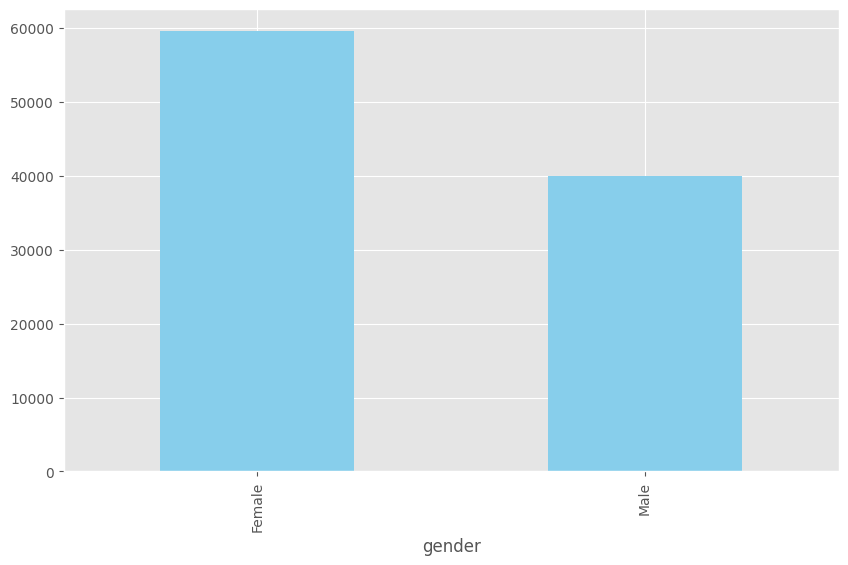

In [65]:
df['gender'].value_counts() \
    .plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.show()

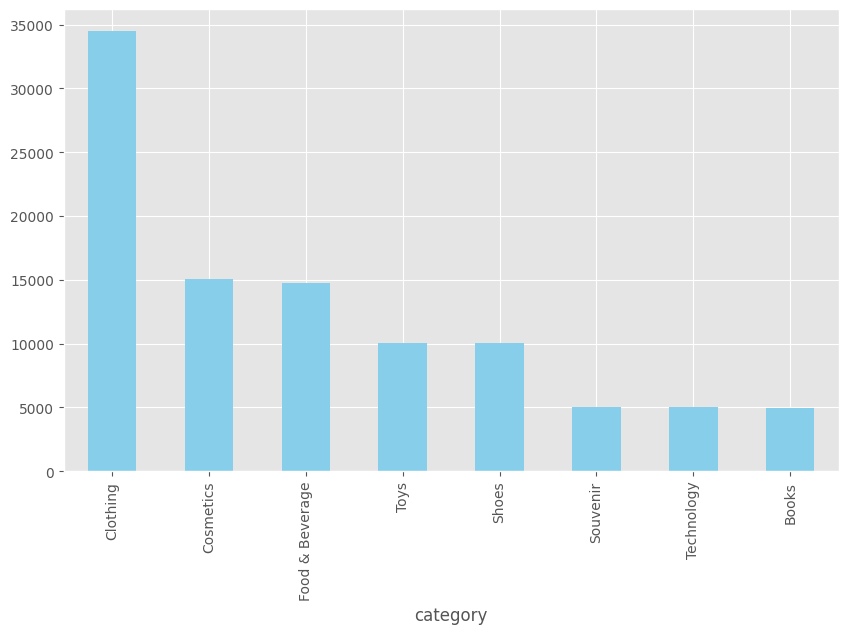

In [92]:
df['category'].value_counts() \
    .plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.show()

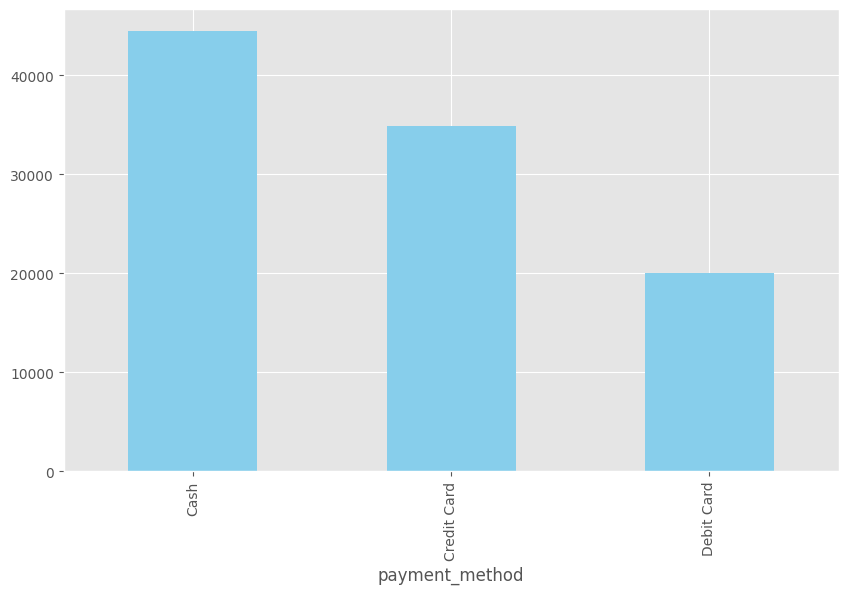

In [93]:
df['payment_method'].value_counts() \
    .plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.show()

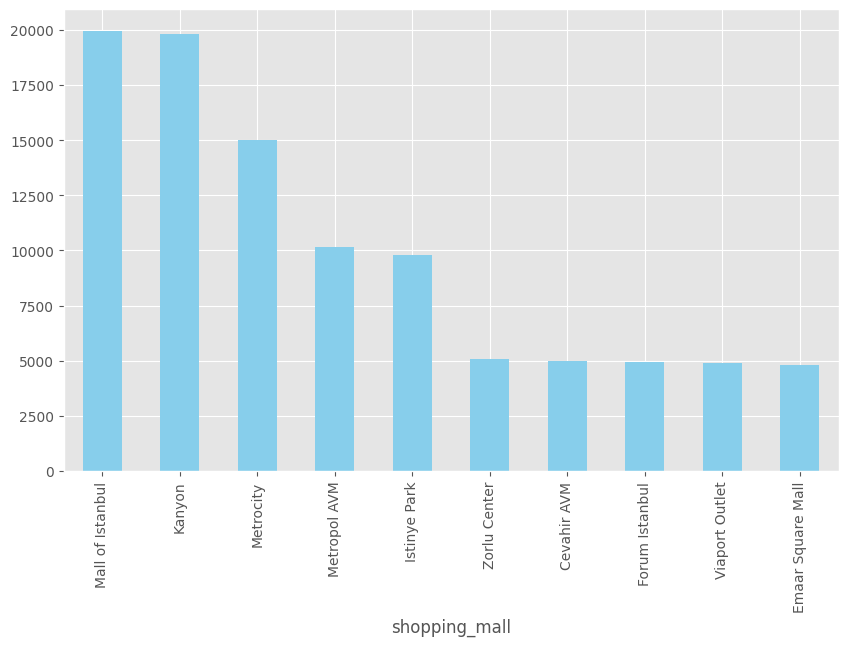

In [64]:
df['shopping_mall'].value_counts() \
    .plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.show()

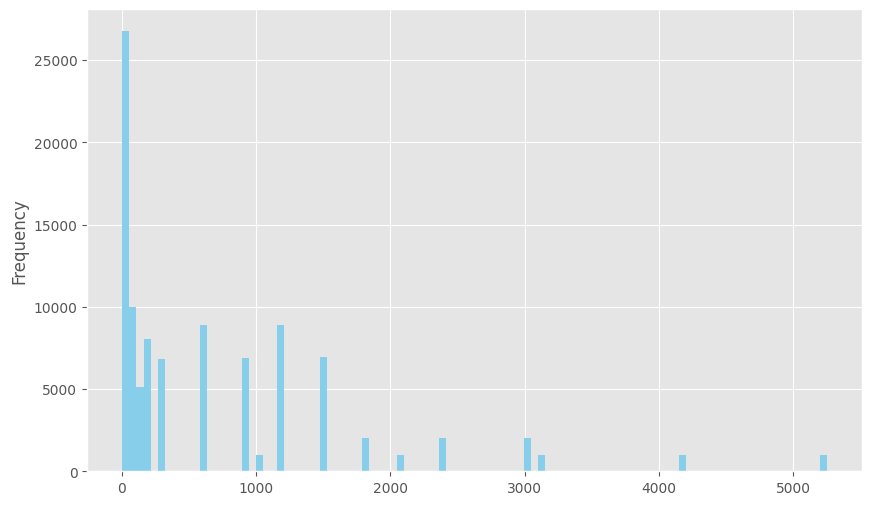

In [113]:
df['price'].plot(kind='hist', color='skyblue', figsize=(10, 6), bins=100)
plt.show()

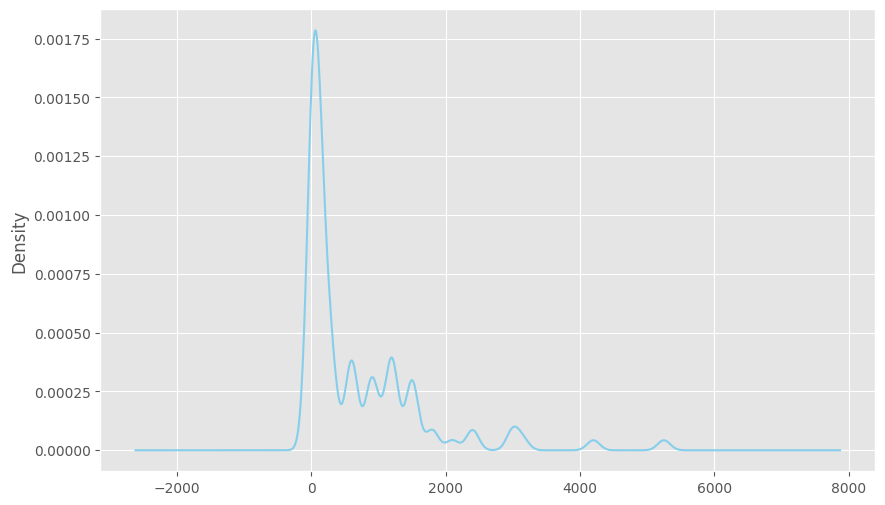

In [114]:
df['price'].plot(kind='kde', color='skyblue', figsize=(10, 6))
plt.show()

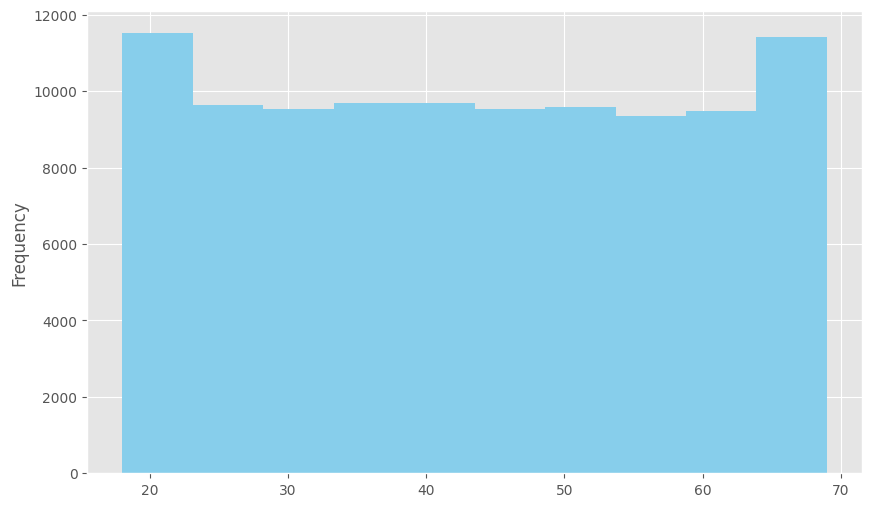

In [130]:
df['age'].plot(kind='hist', color='skyblue', figsize=(10, 6), bins=10)
plt.show()

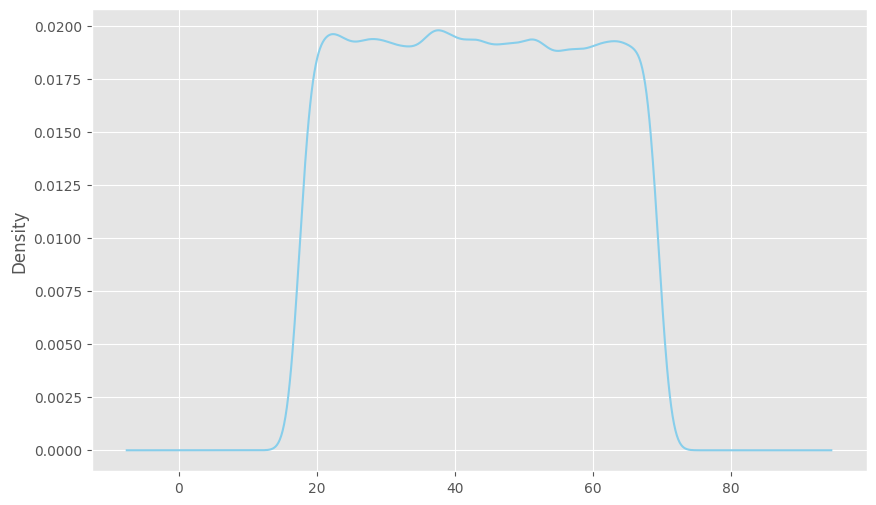

In [131]:
df['age'].plot(kind='kde', color='skyblue', figsize=(10, 6))
plt.show()

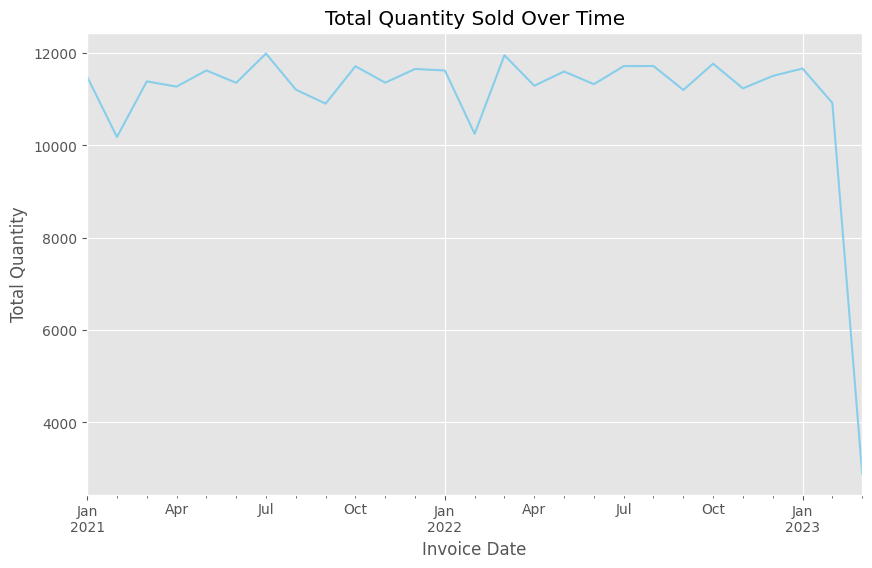

In [68]:
df.resample('ME', on='invoice_date')['quantity'].sum() \
    .plot(kind='line', color='skyblue', figsize=(10, 6))

plt.title('Total Quantity Sold Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

* Bivariate analysis

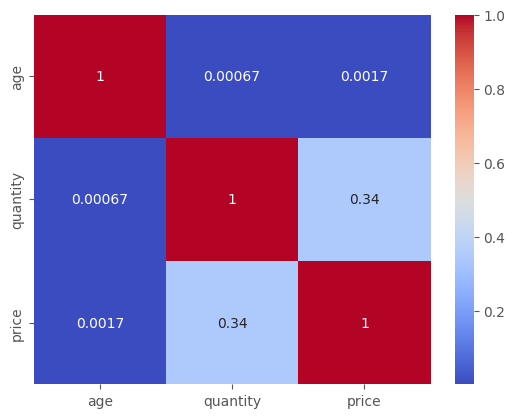

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

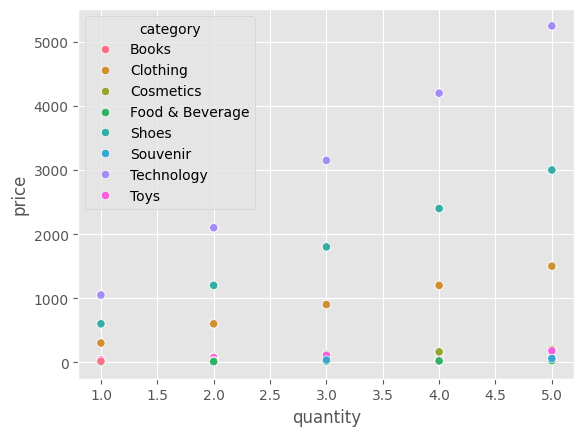

In [151]:
sns.scatterplot(x='quantity', y='price', data=df, hue='category')
plt.show()

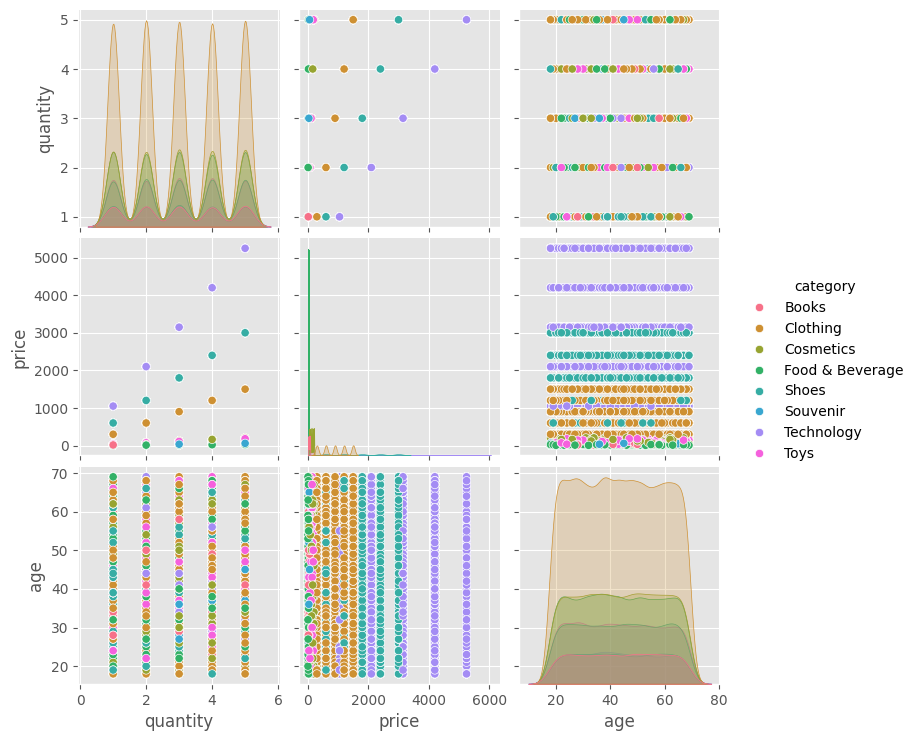

In [149]:
sns.pairplot(df, vars=['quantity', 'price', 'age'], hue='category', palette='husl')
plt.show()

C:\Users\juanm\AppData\Local\Temp\ipykernel_8564\2811170297.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='price', data=df, palette='husl')


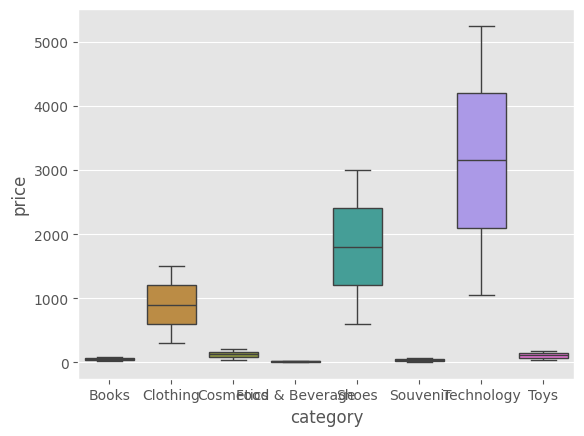

In [ ]:
sns.boxplot(x='category', y='price', data=df, palette='husl')
plt.show()

# Iterate: EDA it is not lineal, repeat steps

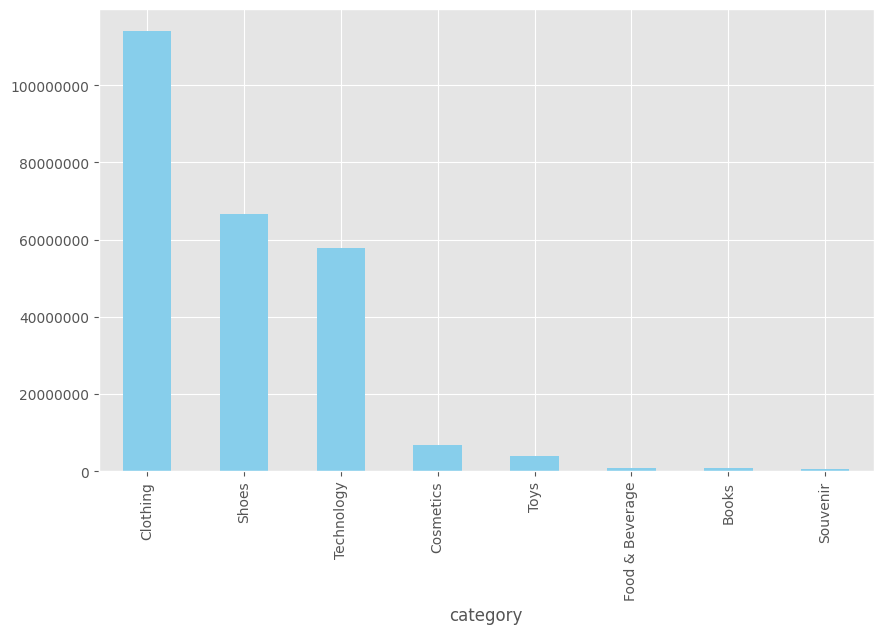

In [68]:
grp = df.groupby('category', observed=False)
grp['total_price'].sum().sort_values(ascending=False) \
    .plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.ticklabel_format(style='plain', axis='y')
plt.show()

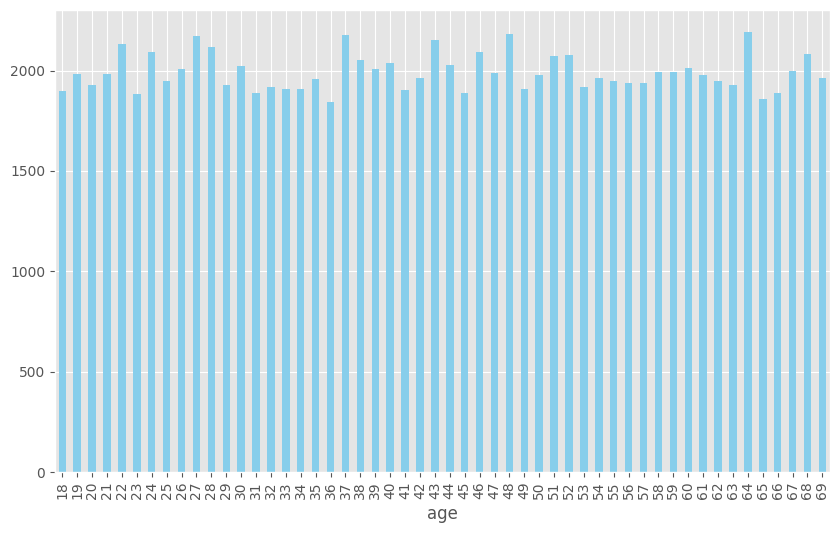

In [95]:
df.loc[(df['category'] == 'Clothing')] \
    .groupby('age')['quantity'].sum() \
    .plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.ticklabel_format(style='plain', axis='y')
plt.show()
